<a href="https://colab.research.google.com/github/HYLee810/projectmanager/blob/main/%EC%9C%A0%EC%9E%AC%EB%AA%85_%EA%B0%95%EC%82%AC_%ED%86%B5%EA%B3%84_%EC%8B%A4%EC%8A%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
file_path = './sample_data/car.xlsx'
df = pd.read_excel(file_path)
print(df)

     mileage   model  price  year  my_car_damage  other_car_damage
0      63608      K3    970  2017              0            564596
1      69336      K3   1130  2015        1839700           1140150
2      36000      K3   1380  2016         446520           2244910
3      19029      K3   1390  2017         889000           4196110
4      97090      K3    760  2015        2339137           2029570
..       ...     ...    ...   ...            ...               ...
269   235000  Avante    390  2007        1473730            507260
270   140000  Avante    430  2009       14399366           4592589
271    96757  Avante    390  2006         303080                 0
272   113853  Avante    390  2008         320780           1857718
273    91000  Avante    350  2006        3128450            401030

[274 rows x 6 columns]


In [2]:
df.mileage.mean()


77483.22262773722

In [3]:
df.mileage.median()

71649.0

<Axes: xlabel='mileage'>

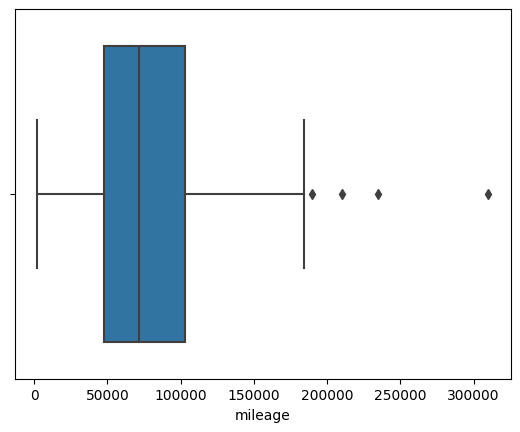

In [4]:
import seaborn as sns
sns.boxplot(x='mileage', data=df)

In [5]:
df.mileage.std() # 표준편차

43015.79445317075

In [6]:
df.mileage.describe()

count       274.000000
mean      77483.222628
std       43015.794453
min        2287.000000
25%       47597.500000
50%       71649.000000
75%      103193.750000
max      310000.000000
Name: mileage, dtype: float64

In [7]:
!pip install pingouin

In [8]:
# mileage의 95% 신뢰구간
import pingouin as pg
pg.ttest(df.mileage, 0, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,29.816386,273,two-sided,7.513310e-88,"[72367.22, 82599.22]",1.801274,1.384e+84,1.0


In [9]:
# 모집단에서 전수조사를 한다면 평균은 72367.22 ~ 82599.22 정도일 것이다.
# 신뢰구간 95%라는 말은 모수 100개중 95개가 통계량에 맞을 때
# 구간을 좁히려면(오차범위를 줄이려면) 데이터를 더 많이 모으면 된다.

# 진짜 평균은 모르지만 딱 하나고! 조사하는 기관마다 평균의 범위가 다르다.
# 신뢰구간 95%라는 말은 조사를 진행한 기관의 95% 정도는 평균을 포함

In [10]:
# 신뢰구간의 문제점
# 1. 계산을 최소한 두번은 해야 함
# 2. 계산에 어려운 이론이 필요. 시뮬레이션을 많이 해야 함
# p-value는 계산도 한번만 하고, 이론도 쉬움

In [11]:
pg.ttest(df.price, 800, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.670492,273,two-sided,0.008028,"[814.1, 893.22]",0.16133,2.205,0.758389


In [12]:
pg.ttest(df.price, 850, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.182174,273,two-sided,0.855581,"[814.1, 893.22]",0.011006,0.069,0.053784


In [13]:
# 800만원은 p-value=0.008은 유의구간(100-95 %)보다 작기 때문에 신뢰구간에 벗어남
# 850만원은 p-value=0.85은 유의구간(100-95 %)보다 크기 때문에 신뢰구간에 존재함

In [14]:
df


,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570
...,...,...,...,...,...,...
269,235000,Avante,390,2007,1473730,507260
270,140000,Avante,430,2009,14399366,4592589
271,96757,Avante,390,2006,303080,0
272,113853,Avante,390,2008,320780,1857718


In [15]:
avante = df.price[df.model == 'Avante']
k3 = df.price[df.model == 'K3']
pg.ttest(avante, k3, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-152.11, -8.69]",0.242614,1.482,0.4119


In [16]:
# 모집단에서 avante의 평균이 k3 평균보다 싸다는 것을 확인
# p-val이 0.02이므로 <0.05 라서 신뢰도95%에 포함되지 않는다

In [17]:
# Avante 평균 - K3 평균이 표본에서 -80만원인데 모집단에서는 95% 신뢰구간이 -152 ~ -8
# 어쨌든 모집단에서 Avante의 평균이 K3의 평균보다 낮다는 결론
# ---
# 귀무가설(기각할 가설): 둘이 똑같다(평균 차이 = 0)
# 0.028187 < 0.05
# 귀무가설 기각 -> 둘은 평균이 다르다
# "통계적으로 유의한 차이"(Avante와 K3의 차이를 확인할 수 있을만큼 데이터가 충분하다)

##신뢰수준을 무조건 높이면 좋은 건가?
(달리 말하면 조심을 하는 것)
통계적 오류의 두 종류:
False Alarm: 아무 일도 없는 데 있는 것처럼
신뢰수준을 높이면 False Alarm이 줄어듦
Miss: 뭔가 있는데 놓치는 것
신뢰수준을 높이면 Miss는 늘어남
사안에 따라서 얼마나 조심할지(신뢰수준) 달라진다

보통 과학적인 사안에 대해서는 95%

좀 틀려도 괜찮다 95%(즉 5% 정도는 틀려도 됨)- 아 이건 좀 틀리면 곤란한데.. 99%(즉 1%정도만 틀리겠다)

In [18]:
pg.ttest(avante, k3, confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-174.9767711674258, 14.182851054311639]",0.242614,1.482,0.4119


In [19]:
pg.corr(df.price, df.mileage)

,n,r,CI95%,p-val,BF10,power
pearson,274,-0.67616,"[-0.74, -0.61]",5.809388e-38,5.069e+34,1.0


In [20]:
pg.corr(df.price, df.year)

,n,r,CI95%,p-val,BF10,power
pearson,274,0.828908,"[0.79, 0.86]",1.388002e-70,1.004e+67,1.0


### 가격과 마일리지의 상관계수를 구하는 코드
r이 표본상관계수 : -0.67616
* 부호가 - => 서로 반대로 움직인다
* 마일리지가 높을수록 가격이 떨어진다

모집단에서는 어떨가?
* 95% 신뢰구간 : -0.74 ~ -0.61
* 5.809388e-38 < 0.05
* 귀무가설: 모집단 상관계수 = 0(관련이 없다)
    - 5.809388e-38 < 0.05
    - 귀무가설 기각 => 관련이 있다

In [21]:
df.corr(numeric_only=True)

,mileage,price,year,my_car_damage,other_car_damage
mileage,1.000000,-0.676160,-0.569850,0.192549,0.007950
price,-0.676160,1.000000,0.828908,-0.418789,-0.245997
year,-0.569850,0.828908,1.000000,-0.318469,-0.204411
my_car_damage,0.192549,-0.418789,-0.318469,1.000000,0.243626
other_car_damage,0.007950,-0.245997,-0.204411,0.243626,1.000000


<Axes: xlabel='mileage', ylabel='price'>

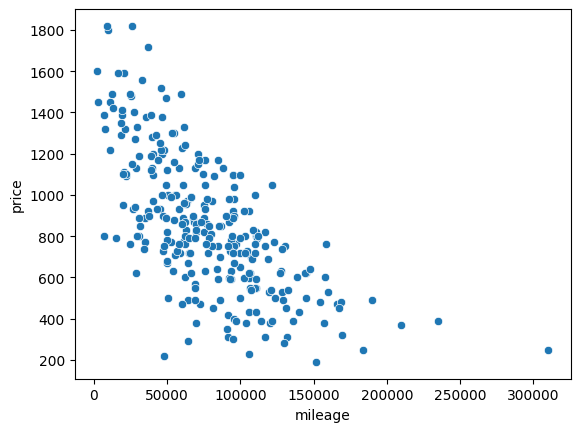

In [22]:
sns.scatterplot(x='mileage', y='price', data=df)

<Axes: xlabel='year', ylabel='price'>

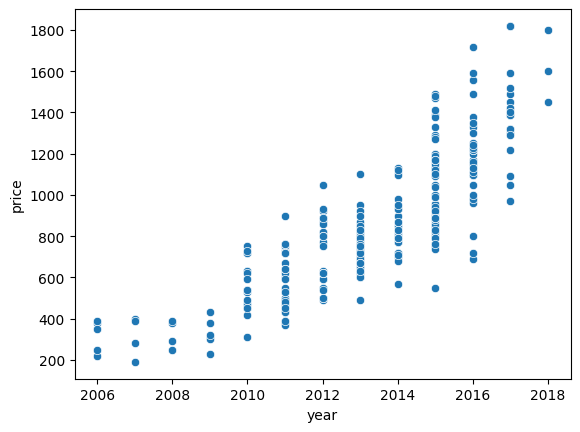

In [23]:
sns.scatterplot(x='year', y='price', data=df)

In [24]:
import numpy as np
import scipy as sp

In [25]:
from statsmodels.formula.api import ols #최소제곱법

In [26]:
m = ols("price ~ mileage", data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           5.81e-38
Time:                        02:54:38   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='mileage', ylabel='price'>

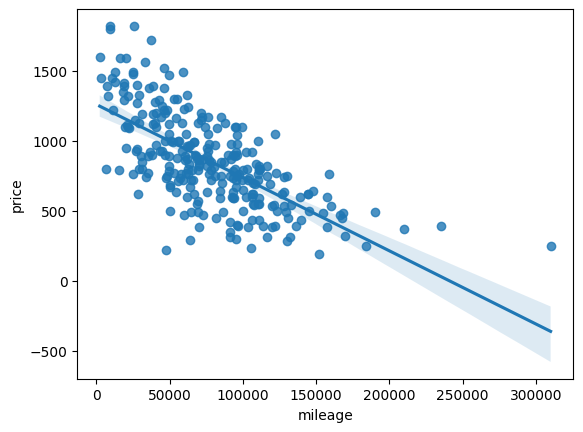

In [27]:
sns.regplot(x='mileage', y='price', data=df)

## 해석
Intercept	1258.7668 : 절편
mileage	-0.0052 : 가중치

price = −0.0052 × mileage + 1258.7668

In [28]:
new_df = pd.DataFrame({'mileage': [10000, 20000]})
m.predict(new_df)

0    1206.483684
1    1154.200600
dtype: float64

In [29]:
m = ols("year ~ price", data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     597.3
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.39e-70
Time:                        02:54:39   Log-Likelihood:                -489.81
No. Observations:                 274   AIC:                             983.6
Df Residuals:                     272   BIC:                             990.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2007.7650      0.242   8301.452      0.000    2007.289    2008.241
price          0.0065      0.000     24.439      0.000       0.006       0.007
==============================================================================
Omnibus:                        3.102   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                2.970
Skew:                          -0.255   Prob(JB):                        0.226
Kurtosis:                       3.015   Cond. No.                     2.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='year', ylabel='price'>

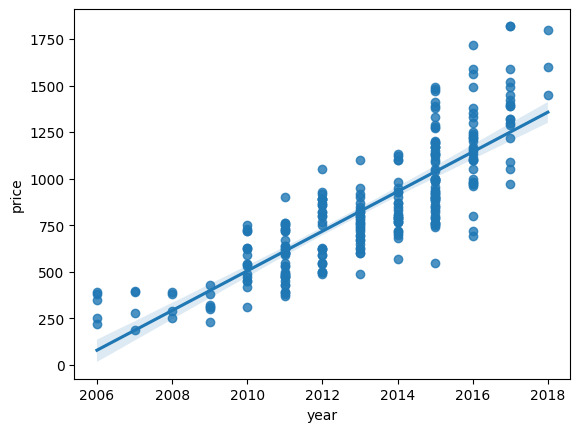

In [30]:
sns.regplot(x='year', y='price', data=df)

##해석
가격 = -213500 + 106.4745*year

p-value < 0.05

귀무가설 기각

1년에 약 106만원은 연식 + 교통사고 확률 + 높은 마일리지 모드를 고려함

In [31]:
new_df = pd.DataFrame({'year': [2014,2015,2016,2017]})
new_df

,year
0,2014
1,2015
2,2016
3,2017


In [33]:
pg.corr(df.price, df.year)

,n,r,CI95%,p-val,BF10,power
pearson,274,0.828908,"[0.79, 0.86]",1.388002e-70,1.004e+67,1.0


In [34]:
m = ols("price ~ mileage+year", data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     403.5
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           5.62e-82
Time:                        02:55:01   Log-Likelihood:                -1790.2
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     271   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.688e+05   9597.865    -17.592      0.000   -1.88e+05    -1.5e+05
mileage       -0.0023      0.000     -8.143      0.000      -0.003      -0.002
year          84.3822      4.761     17.724      0.000      75.009      93.755
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                           0.435   Prob(JB):                      0.00276
Kurtosis:                       3.523   Cond. No.                     8.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 해석
가격 = -168800 + -0.0023 * mileage + 84.3822 * year

주행거리를 <<통계적으로 통제>>했을 때, 연식이 가격에 미치는 영향은 1년에 84만원

연식을 <<통계적으로 통제>>했을 때, 주행거리가 가격에 미치는 영향은 1km에 -23원

R-squared:	0.749 (75% 예측가능)

P-value <0.05 귀무가설 기각

In [35]:
mileage = 50000
year = 2013
-1.688e+05 -0.0023 * mileage + 84.3822 * year

946.368599999987

In [36]:
new_df = pd.DataFrame({'mileage': [50000], 'year': [2013]})
m.predict(new_df)

0    894.702049
dtype: float64

In [37]:
# price ~ scale(mileage) + scale(year)
m = ols("price ~ scale(mileage) + scale(year)", data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     403.5
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           5.62e-82
Time:                        02:55:08   Log-Likelihood:                -1790.2
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     271   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        853.6606     10.112     84.419      0.000     833.752     873.569
scale(mileage)  -100.2044     12.306     -8.143      0.000    -124.431     -75.978
scale(year)      218.1006     12.306     17.724      0.000     193.874     242.327
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                           0.435   Prob(JB):                      0.00276
Kurtosis:                       3.523   Cond. No.                         1.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 해석
표준화했을 때, 절편이 853만원이라는 뜻 :
평균적인 마일리지와 평균적인 year의 차가 853만원정도 한다

가격 = 853.6606 + -100.2044 * mileage + 218.1006 * year

* mileage가 1표준편차(43015Km) 증가하면
가격은 100만원 떨어진다
* year가 1표준편차(2.6년) 증가하면 가격은 218만원 상승
* year가 가격에는 영향이 더 크다고 할 수 있음


표준화를 하든 안하든 예측은 같음

In [50]:
df.mileage.std()


43015.79445317075

In [49]:
df.year.std()

2.5894055796873823

In [48]:
m.params



Intercept      833.414634
model[T.K3]     80.396960
dtype: float64

In [47]:
m.params['Intercept']

833.414634146341

In [ ]:
m.predict(new_df)

In [45]:
# 자동차 모델(범주)과 가격의 상관관계
m = ols('price ~ model', data=df).fit()
m.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.039
Date:                Thu, 14 Sep 2023   Prob (F-statistic):             0.0824
Time:                        02:56:30   Log-Likelihood:                -1977.9
No. Observations:                 274   AIC:                             3960.
Df Residuals:                     272   BIC:                             3967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     833.4146     23.144     36.009      0.000     787.850     878.980
model[T.K3]    80.3970     46.121      1.743      0.082     -10.402     171.196
==============================================================================
Omnibus:                       13.893   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.007
Skew:                           0.573   Prob(JB):                     0.000551
Kurtosis:                       3.002   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 해석
model[T.K3]	80.3970

Intercept	833.4146 (아반떼 가격)

가격= 833 + 80*model[T.K3]

* 아반떼 : model[T.K3]=0
* K3: model[T.K3]=1

p-value > 0.05
귀무가설: "둘의 차이 = 0"을 기각할 수 없음

신뢰구간 -10.402	 ~ 171.196 (0도 포함)

10만원 쌀 수도 있고 같을수도(0)있고 171만원 비쌀 수도 있다

모집단에서도 K3가 Avante보다 비싸다고 하기에는 증거가 부족하다


In [44]:
avante = df.price[df.model == 'Avante']
k3 = df.price[df.model == 'K3']
pg.ttest(avante, k3, correction=False)
# 독립표본 t 검정에서 보정을 안하면(correction=False) 회기분석과 결과가 같음
# 보정을 하는 것이 더 정확 / 두 변수간에 비교에 적합 / 예측은 아님
# 무엇을 보정하나? 이분산성(heteroscedasticity): 가격대가 퍼져있는 정도가 다르다

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.743179,272,two-sided,0.082432,"[-171.2, 10.4]",0.242614,0.627,0.4119


In [43]:
m = ols('price ~ year + mileage + model', data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     271.9
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           2.98e-81
Time:                        02:56:23   Log-Likelihood:                -1788.8
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     270   BIC:                             3600.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.713e+05   9670.404    -17.714      0.000    -1.9e+05   -1.52e+05
model[T.K3]   -40.4089     23.626     -1.710      0.088     -86.925       6.107
year           85.6030      4.798     17.843      0.000      76.158      95.048
mileage        -0.0023      0.000     -8.186      0.000      -0.003      -0.002
==============================================================================
Omnibus:                        9.726   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.901
Skew:                           0.405   Prob(JB):                      0.00708
Kurtosis:                       3.458   Cond. No.                     8.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
import pandas as pd
file_path = './sample_data/price.xlsx'

In [58]:
pr = pd.read_excel('./sample_data/price.xlsx').sort_index(ascending=False)
pr.head()
pr.loc[100]

Date        01/01/2015
SPX            1994.99
KOSPI200        249.88
GOLD            1280.0
Name: 100, dtype: object

In [62]:
pr.Date=pd.to_datetime(pr.Date)  # 날짜 형식으로 변환
pr.set_index('Date', inplace=True) # Date를 행으로
pr

,SPX,KOSPI200,GOLD
Date,,,
2001-02-01,1239.94,72.14,268.9
2001-03-01,1160.33,65.16,259.2
2001-04-01,1249.46,72.45,264.9
2001-05-01,1255.82,76.09,266.9
2001-06-01,1224.38,73.20,272.0
...,...,...,...
2023-01-01,4076.60,317.26,1962.2
2023-02-01,3970.15,314.80,1853.2
2023-03-01,4109.31,322.03,1969.0


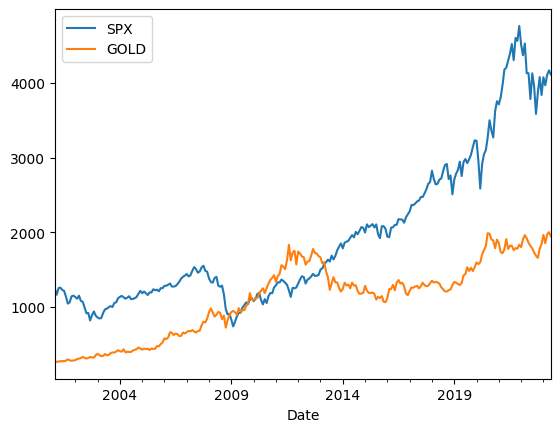

In [66]:
import matplotlib.pyplot as plt
pr.SPX.plot()
pr.GOLD.plot()
plt.legend()

In [67]:
pr.SPX

Date
2001-02-01    1239.94
2001-03-01    1160.33
2001-04-01    1249.46
2001-05-01    1255.82
2001-06-01    1224.38
               ...   
2023-01-01    4076.60
2023-02-01    3970.15
2023-03-01    4109.31
2023-04-01    4169.48
2023-05-01    4115.24
Name: SPX, Length: 268, dtype: float64

<Axes: xlabel='Date'>

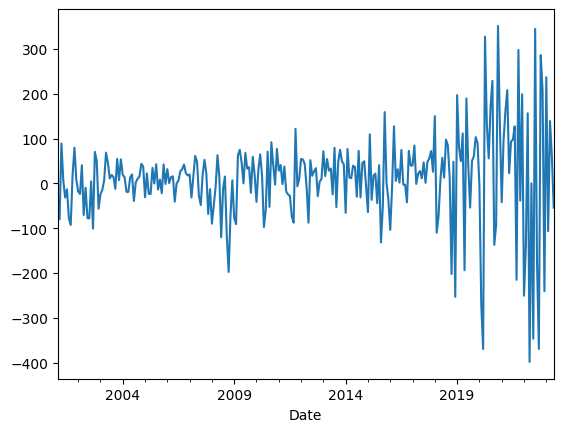

In [69]:
pr.SPX.diff().plot() # mom으로 변화량 체크

<Axes: xlabel='Date'>

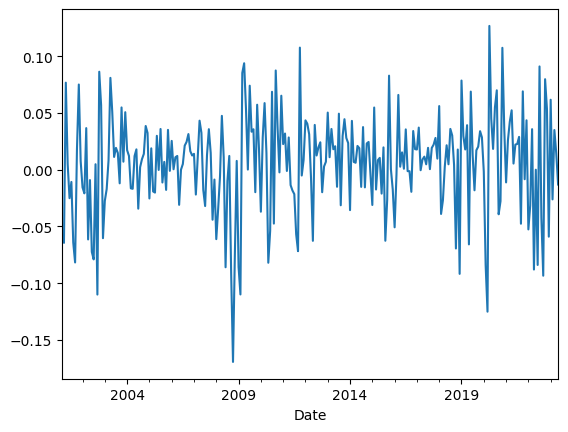

In [70]:
pr.SPX.pct_change().plot() # 변화량을 %로 변환

In [71]:
# 미국 주식 변동과 금 가격 변동의 상관관계
pg.corr(pr.SPX.pct_change(), pr.GOLD.pct_change())
r=0.067이기 때문에 헷징

,n,r,CI95%,p-val,BF10,power
pearson,267,0.067286,"[-0.05, 0.19]",0.273275,0.139,0.195049


In [72]:
# 미국 주식 변동과 한국 주식 가격 변동의 상관관계
pg.corr(pr.SPX.pct_change(), pr.KOSPI200.pct_change())

# 0.68이기 때문에 상관관계가 높아 둘다 투자 하는 것은 불리

,n,r,CI95%,p-val,BF10,power
pearson,267,0.684075,"[0.61, 0.74]",3.473300e-38,8.433e+34,1.0


In [73]:
pg.corr(pr.GOLD.pct_change(), pr.KOSPI200.pct_change())

,n,r,CI95%,p-val,BF10,power
pearson,267,0.131613,"[0.01, 0.25]",0.031568,0.763,0.577117


<Axes: xlabel='Date'>

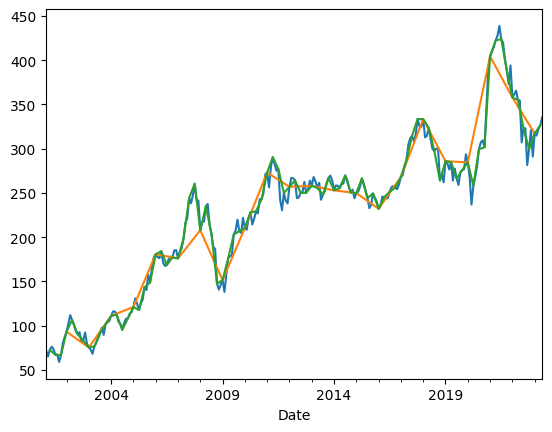

In [76]:
pr.KOSPI200.plot()
pr.KOSPI200.asfreq('AS').plot() # 연초만 보기
pr.KOSPI200.asfreq('QS').plot() # 분기초만 보기

In [77]:
df = pd.read_excel('./sample_data/GOOG.xlsx')
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)

In [78]:
df.Price['2016-12-30':'2017-01-03']

Date
2016-12-30    771.82
2017-01-03    786.14
Name: Price, dtype: float64

In [79]:
df.Price.asfreq('A', method='ffill') # 빈칸일 경우 전 날 data를 복사

Date
2014-12-31     524.96
2015-12-31     758.88
2016-12-31     771.82
2017-12-31    1046.40
2018-12-31    1035.61
2019-12-31    1337.02
2020-12-31    1751.88
2021-12-31    2893.59
Freq: A-DEC, Name: Price, dtype: float64

In [80]:
df.Price.asfreq('A', method='bfill') # 빈칸일 경우 다음날 data를 복사

Date
2014-12-31     524.96
2015-12-31     758.88
2016-12-31     786.14
2017-12-31    1065.00
2018-12-31    1035.61
2019-12-31    1337.02
2020-12-31    1751.88
2021-12-31    2893.59
Freq: A-DEC, Name: Price, dtype: float64

In [81]:
df.Price.resample('AS').mean()

Date
2014-01-01     552.645699
2015-01-01     602.005556
2016-01-01     743.330277
2017-01-01     921.781394
2018-01-01    1113.225139
2019-01-01    1188.393056
2020-01-01    1481.403794
2021-01-01    2510.613452
Freq: AS-JAN, Name: Price, dtype: float64